In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Define functions

# Find the slope of the best fitting line
def fit_slope(x, y):
    return (np.mean(x) * np.mean(y) - np.mean(x * y)) / (np.mean(x)**2 - np.mean(x**2))

# Rotate point counterclockwise
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

# Calculate variation
def variation(array, mean=0):
    return np.sum((mean - array) ** 2) / (array.shape[0]-1)

# Find the coordination of the intersection between 2 lines
def lines_intersection(coefficients1, coefficients2):
    coefficients1, coefficients2 = np.copy(coefficients1), np.copy(coefficients2)
    if coefficients1.shape[0] < coefficients2.shape[0]:
        coefficients1 = np.pad(coefficients1, (0,coefficients2.shape[0]-coefficients1.shape[0]), 
                           'constant', constant_values=0)
        bias1 = 0
        bias2 = coefficients2[-1]
    elif coefficients1.shape[0] > coefficients2.shape[0]:
        coefficients2 = np.pad(coefficients2, (0, coefficients1.shape[0]-coefficients2.shape[0]), 
                           'constant', constant_values=0)
        bias2 = 0
        bias1 = coefficients1[-1]
    else:
        bias1 = coefficients1[-1]
        bias2 = coefficients2[-1]
    bias_sum = bias2 - bias1
    coefficients1 = coefficients1[:-1]
    coefficients2 = coefficients2[:-1]
    total = 0
    for i in range(coefficients1.shape[0]):
        total += coefficients1[i] + (-1 * coefficients2[i])
        
    # No intersection
    if total == 0:
        return None
    x = (1/total) * bias_sum
    y = [x * coefficients1 + bias1][0][0]
    return [x,y]
    
# Find a prependicular line (can be moved from some point (origin))
def find_prependicular_line(coefficients, origin=None):
    coefficients = np.copy(coefficients)
    bias = coefficients[-1]
    slopes = coefficients[:-1]
    slopes = -1 * np.reciprocal(slopes, dtype='float')
    coefficients[:-1] = slopes
    if origin is None:
        origin = np.zeros(coefficients.shape[0]-1)
    bias += np.sum(slopes * -1 * origin[:-1]) + origin[-1]
    coefficients[-1] = bias
    return coefficients

def project_points_onto_line(x, y, coefficients):
    if x.shape[0] != y.shape[0]:
        return None
    projections_x = np.zeros(x.shape[0])
    projections_y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        # pr is prependicular line
        pr_slope, pr_b = find_prependicular_line(coefficients, np.array([x[i], y[i]]))
        inter_x, inter_y = lines_intersection(coefficients, np.array([pr_slope, pr_b]))
        projections_x[i] = inter_x
        projections_y[i] = inter_y
    return projections_x, projections_y

Text(0.5, 1.0, 'Original data')

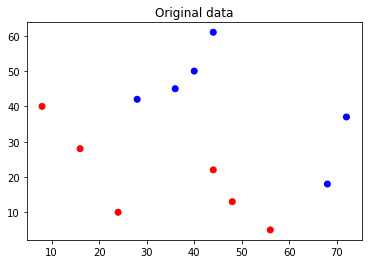

In [3]:
x1 = np.array([8, 16, 24, 28, 36, 40, 44, 44, 48, 56, 72, 68], dtype='float')
x2 = np.array([40, 28, 10, 42, 45, 50, 61, 22, 13, 5, 37, 18], dtype='float')
y = np.array(['red', 'red' ,'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue'])

red_points = np.array(list(zip(x1[y == 'red'], x2[y == 'red'])))
blue_points = np.array(list(zip(x1[y == 'blue'], x2[y == 'blue'])))

#Visualize original data
plt.scatter(x1,x2, color=y)
plt.title("Original data")

In [4]:
# Calculate centroids of red points, and another for blue points
red_points_mean_x, red_points_mean_y = red_points[:,0].mean(), red_points[:,1].mean()
blue_points_mean_x, blue_points_mean_y = blue_points[:,0].mean(), blue_points[:,1].mean()

# Calculate the centroid of centroids
x_mean = (red_points_mean_x + blue_points_mean_x) / 2
y_mean = (red_points_mean_y + blue_points_mean_y) / 2

In [5]:
# Find the line which is prependicular to the (futuristic) best-separator line
best_separator_prependicular_x_points = np.array([red_points_mean_x, blue_points_mean_x])
best_separator_prependicular_slope = fit_slope(best_separator_prependicular_x_points,
                                        np.array([red_points_mean_y, blue_points_mean_y]))
best_separator_prependicular_y_intercept = y_mean  - best_separator_prependicular_slope * best_separator_prependicular_x_points.mean()
best_separator_prependicular_y_points = best_separator_prependicular_x_points * best_separator_prependicular_slope + best_separator_prependicular_y_intercept

Text(0.5, 1.0, 'Groups Centroids')

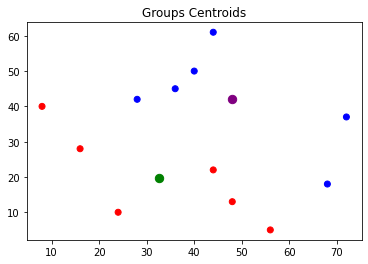

In [6]:
# Visualize Groups Centroids
plt.scatter(x1,x2, color=y)
plt.scatter(red_points_mean_x, red_points_mean_y, color='green',s=70)
plt.scatter(blue_points_mean_x, blue_points_mean_y, color='purple', s=70)
plt.title("Groups Centroids")

Text(0.5, 1.0, 'Prependicular (on separator) line')

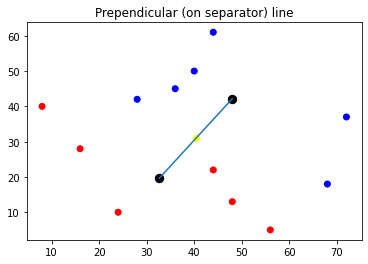

In [7]:
# Visualize prependicular line
plt.scatter(x1,x2, color=y)
plt.scatter(red_points_mean_x, red_points_mean_y, color='black', s=70)
plt.scatter(blue_points_mean_x, blue_points_mean_y, color='black', s=70)
plt.scatter(x_mean, y_mean, color='yellow')
plt.plot(best_separator_prependicular_x_points, best_separator_prependicular_y_points)
plt.title("Prependicular (on separator) line")

In [8]:
# Find the best separator line
best_separator_slope, best_separator_y_intercept = find_prependicular_line([best_separator_prependicular_slope, best_separator_prependicular_y_intercept],
                                           origin=[x_mean, y_mean])
best_separator_x_points = np.arange(np.min(x1), np.max(x1)+1)
best_separator_y_points = (best_separator_slope) * best_separator_x_points + best_separator_y_intercept+ (-best_separator_prependicular_y_intercept)

Text(0.5, 1.0, 'Best-separator & its prependicular')

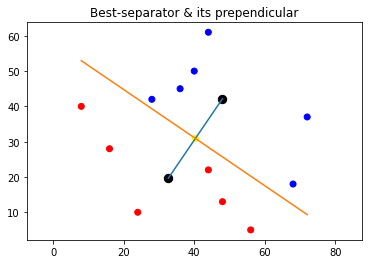

In [9]:
# Visualize best-separator line and its prependicular
plt.scatter(x1,x2, color=y)
plt.scatter(red_points_mean_x, red_points_mean_y, color='black', s=70)
plt.scatter(blue_points_mean_x, blue_points_mean_y, color='black', s=70)
plt.scatter(x_mean, y_mean, color='yellow')
plt.plot(best_separator_prependicular_x_points, best_separator_prependicular_y_points)
plt.plot(best_separator_x_points, best_separator_y_points)
plt.axis('equal')
plt.title("Best-separator & its prependicular")

Text(0.5, 1.0, 'Best-separator line')

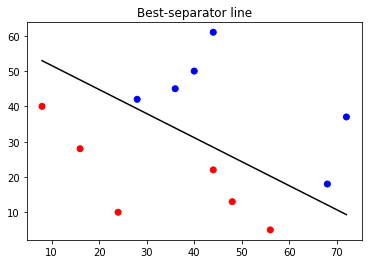

In [10]:
# Visualize separator line
plt.scatter(x1,x2, color=y)
plt.plot(best_separator_x_points, best_separator_y_points, color='black')
# plt.axis('equal')
plt.title("Best-separator line")

In [11]:
# Rotate everything so the separator is identical on Y-axis
degrees = math.radians(270) - math.atan(best_separator_slope)
origin = [0,0]
x1,x2 = rotate(origin, [x1,x2], degrees)
[best_separator_x_points, best_separator_y_points] = rotate(origin, [best_separator_x_points, best_separator_y_points], degrees)

Text(0.5, 1.0, 'Data & Best-separator after rotation')

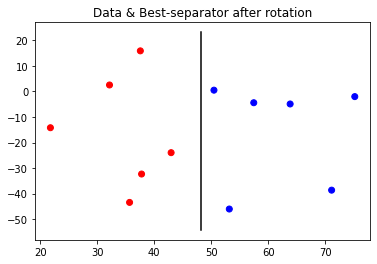

In [12]:
# Visualize separator after rotation
plt.scatter(x1,x2, color=y)
plt.plot(best_separator_x_points, best_separator_y_points, color='black')
# plt.axis('equal')
plt.title("Data & Best-separator after rotation")

In [13]:
# Project data on X-axis
projections_lda1 = x1
zeros = np.zeros(projections_lda1.shape[0])

Text(0.5, 1.0, 'Data projected on X-axis')

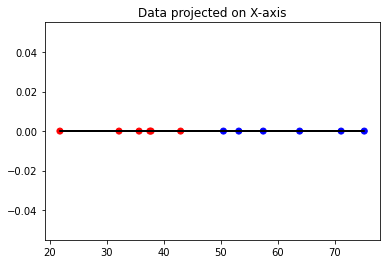

In [14]:
# Visualize data projected on X-axis
plt.scatter(x1,zeros, color=y)
plt.plot(projections_lda1, zeros, color='black')
# plt.axis('equal')
plt.title("Data projected on X-axis")

Text(0.5, 1.0, 'Final result')

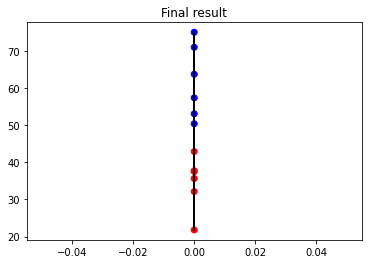

In [15]:
# Visualize data on Y-axis
plt.scatter(zeros ,x1, color=y)
plt.plot(zeros, projections_lda1, color='black')
# plt.axis('equal')
plt.title("Final result")

In [16]:
# Calculate margin
margin = np.mean([np.max(x1[y=='red']), np.min(x1[y=='blue'])])
print(f"Margin = {margin}")

Margin = 46.71670576597295
